In [65]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scrublet as scr
import celltypist
from celltypist import models
import decoupler as dc
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=150)

# Import raw files

In [66]:
inpath="/home/lugli/spuccio/Projects/SP039/FileH5AD_input/"

In [67]:
NS02 = sc.read(inpath+"NS02.h5ad")
NS03 = sc.read(inpath+"NS03.h5ad")
NS04 = sc.read(inpath+"NS04.h5ad")
NS06 = sc.read(inpath+"NS06.h5ad")
NS07 = sc.read(inpath+"NS07.h5ad")
NS12 = sc.read(inpath+"NS12.h5ad")
NS13 = sc.read(inpath+"NS13.h5ad")
NS16 = sc.read(inpath+"NS16.h5ad")
NS17 = sc.read(inpath+"NS17.h5ad")
NS19 = sc.read(inpath+"NS19.h5ad")

# Read Metadata

In [68]:
metadata = pd.read_excel('Metadata2.xlsx')

In [69]:
metadata['Sample'] =   [ 'Patient' + str(col) for col in metadata.Sample]

In [70]:
metadata.head(50)

SampleID       GEO_RNA           Cohort          Type  \
0              PJ048    GSM2940098        GSE103224  PrimaryTumor   
1              PJ030    GSM2758475        GSE103224  PrimaryTumor   
2              PJ025    GSM2758474        GSE103224  PrimaryTumor   
3              PJ018    GSM2758473        GSE103224  PrimaryTumor   
4              PJ017    GSM2758472        GSE103224  PrimaryTumor   
5              PJ016    GSM2758472        GSE103224  PrimaryTumor   
6             MGH102  NotAvailable        GSE131928  PrimaryTumor   
7             MGH105  NotAvailable        GSE131928  PrimaryTumor   
8             MGH115  NotAvailable        GSE131928  PrimaryTumor   
9             MGH124  NotAvailable        GSE131928  PrimaryTumor   
10            MGH125  NotAvailable        GSE131928  PrimaryTumor   
11            MGH126  NotAvailable        GSE131928  PrimaryTumor   
12               ND1  NotAvailable        GSE163120  PrimaryTumor   
13               ND2  NotAvailable        GSE163120  PrimaryTumor   
14               ND3  NotAvailable        GSE163120  PrimaryTumor   
15               ND4  NotAvailable        GSE163120  PrimaryTumor   
16               ND5  NotAvailable        GSE163120  PrimaryTumor   
17               ND6  NotAvailable        GSE163120  PrimaryTumor   
18              NS02    GSM3827162        GSE131907    Metastasis   
19              NS03    GSM3827163        GSE131907    Metastasis   
20              NS04    GSM3827164        GSE131907    Metastasis   
21              NS06    GSM3827165        GSE131907    Metastasis   
22              NS07    GSM3827166        GSE131907    Metastasis   
23              NS12    GSM3827167        GSE131907    Metastasis   
24              NS13    GSM3827168        GSE131907    Metastasis   
25              NS16    GSM3827169        GSE131907    Metastasis   
26              NS17    GSM3827170        GSE131907    Metastasis   
27              NS19    GSM3827171        GSE131907    Metastasis   
28           GLIO1_T  NotAvailable  InternalCohort2  PrimaryTumor   
29           GLIO2_T  NotAvailable  InternalCohort2  PrimaryTumor   
30           GLIO3_T  NotAvailable  InternalCohort2  PrimaryTumor   
31           GLIO4_T  NotAvailable  InternalCohort2  PrimaryTumor   
32           GLIO5_T  NotAvailable  InternalCohort2  PrimaryTumor   
33           GLIO6_T  NotAvailable  InternalCohort2  PrimaryTumor   
34           GLIO7_T  NotAvailable  InternalCohort2  PrimaryTumor   
35         Ovarian_2    GSM5645898        GSE186344    Metastasis   
36          Breast_2    GSM5645892        GSE186344    Metastasis   
37           Melan_3    GSM5645890        GSE186344    Metastasis   
38            Lung_1    GSM5645894        GSE186344    Metastasis   
39            Lung_2    GSM5645895        GSE186344    Metastasis   
40            Lung_3    GSM5645896        GSE186344    Metastasis   
41        Renal_Cell    GSM5645902        GSE186344    Metastasis   
42         Ovarian_1    GSM5645897        GSE186344    Metastasis   
43        Colorectal    GSM5645900        GSE186344    Metastasis   
44           Melan_2    GSM5645889        GSE186344    Metastasis   
45           Melan_1    GSM5645888        GSE186344    Metastasis   
46  KSO07_BRM112_GEX  NotAvailable  InternalCohort1    Metastasis   
47  KSO07_BRM125_GEX  NotAvailable  InternalCohort1    Metastasis   
48  KSO07_BrM138_GEX  NotAvailable  InternalCohort1    Metastasis   
49  KSO07_BRM139_GEX  NotAvailable  InternalCohort1    Metastasis   

         Subtype               Diagnosis         Grade              Location  \
0      Proneural            Glioblastoma            IV        Right_Parietal   
1      Classical  Anaplastic_Astrocytoma           III         Left_Temporal   
2      Classical            Glioblastoma            IV         Right_Frontal   
3      Proneural            Glioblastoma            IV         Left_Temporal   
4    Mesenchymal            Glioblastoma            IV         Left_Temporal   
5      Prone

# Fix Metadata 

In [71]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS02"].loc[metadata.loc[metadata['SampleID'] == "NS02"].index.repeat(NS02.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS02-" + tmp1.index.astype(str),inplace=True) 
NS02.obs = tmp1

In [72]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS03"].loc[metadata.loc[metadata['SampleID'] == "NS03"].index.repeat(NS03.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS03-" + tmp1.index.astype(str),inplace=True) 
NS03.obs = tmp1

In [73]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS04"].loc[metadata.loc[metadata['SampleID'] == "NS04"].index.repeat(NS04.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS04-" + tmp1.index.astype(str),inplace=True) 
NS04.obs = tmp1

In [74]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS06"].loc[metadata.loc[metadata['SampleID'] == "NS06"].index.repeat(NS06.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS06-" + tmp1.index.astype(str),inplace=True) 
NS06.obs = tmp1

In [75]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS07"].loc[metadata.loc[metadata['SampleID'] == "NS07"].index.repeat(NS07.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS07-" + tmp1.index.astype(str),inplace=True) 
NS07.obs = tmp1

In [76]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS12"].loc[metadata.loc[metadata['SampleID'] == "NS12"].index.repeat(NS12.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS12-" + tmp1.index.astype(str),inplace=True) 
NS12.obs = tmp1

In [77]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS13"].loc[metadata.loc[metadata['SampleID'] == "NS13"].index.repeat(NS13.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS13-" + tmp1.index.astype(str),inplace=True) 
NS13.obs = tmp1

In [78]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS16"].loc[metadata.loc[metadata['SampleID'] == "NS16"].index.repeat(NS16.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS16-" + tmp1.index.astype(str),inplace=True) 
NS16.obs = tmp1

In [79]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS17"].loc[metadata.loc[metadata['SampleID'] == "NS17"].index.repeat(NS17.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS17-" + tmp1.index.astype(str),inplace=True) 
NS17.obs = tmp1

In [80]:
tmp1 = metadata.loc[metadata['SampleID'] == "NS19"].loc[metadata.loc[metadata['SampleID'] == "NS19"].index.repeat(NS19.shape[0])]
tmp1.reset_index(drop=True,inplace=True)
tmp1.set_index( "NS19-" + tmp1.index.astype(str),inplace=True) 
NS19.obs = tmp1

# Concatenate 

In [81]:
adata = NS02.concatenate(NS03,NS04, NS06, NS07,NS12,NS13,NS16,NS17,NS19,
                         index_unique=None)

In [82]:
del(NS03,NS04, NS06, NS07,NS12,NS13,NS16,NS17,NS19,NS02)

In [83]:
print(adata.obs['SampleID'].value_counts())
adata

NS07    5730
NS13    4845
NS19    3300
NS12    3182
NS03    2990
NS17    2409
NS02    2313
NS04    1904
NS16    1317
NS06    1070
Name: SampleID, dtype: int64


AnnData object with n_obs × n_vars = 29060 × 29634
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch'

In [84]:
adata.layers['raw'] = adata.X 

# Calculate QC

In [85]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

In [86]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [87]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [88]:
adata

AnnData object with n_obs × n_vars = 29060 × 29634
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw'

# Plot QC

... storing 'SampleID' as categorical
... storing 'GEO_RNA' as categorical
... storing 'Cohort' as categorical
... storing 'Type' as categorical
... storing 'Subtype' as categorical
... storing 'Diagnosis' as categorical
... storing 'Grade' as categorical
... storing 'Location' as categorical
... storing 'IDH1_Status' as categorical
... storing 'EGFR_Status' as categorical
... storing 'MGMT' as categorical
... storing 'Sample' as categorical
... storing 'Sex' as categorical
... storing 'Age' as categorical
... storing 'Sorted' as categorical
... storing 'MET' as categorical


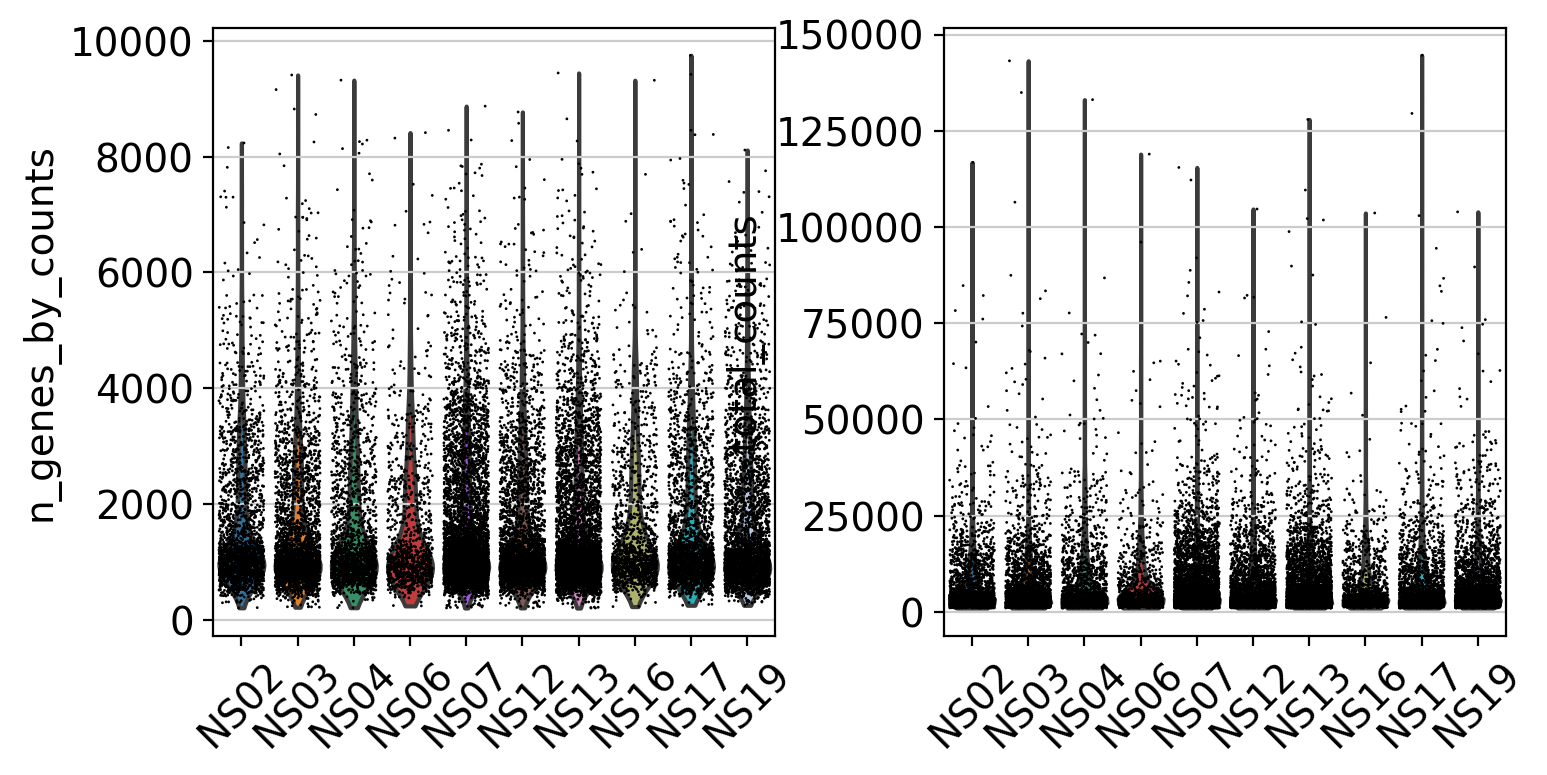

In [89]:
sc.set_figure_params(dpi=100)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

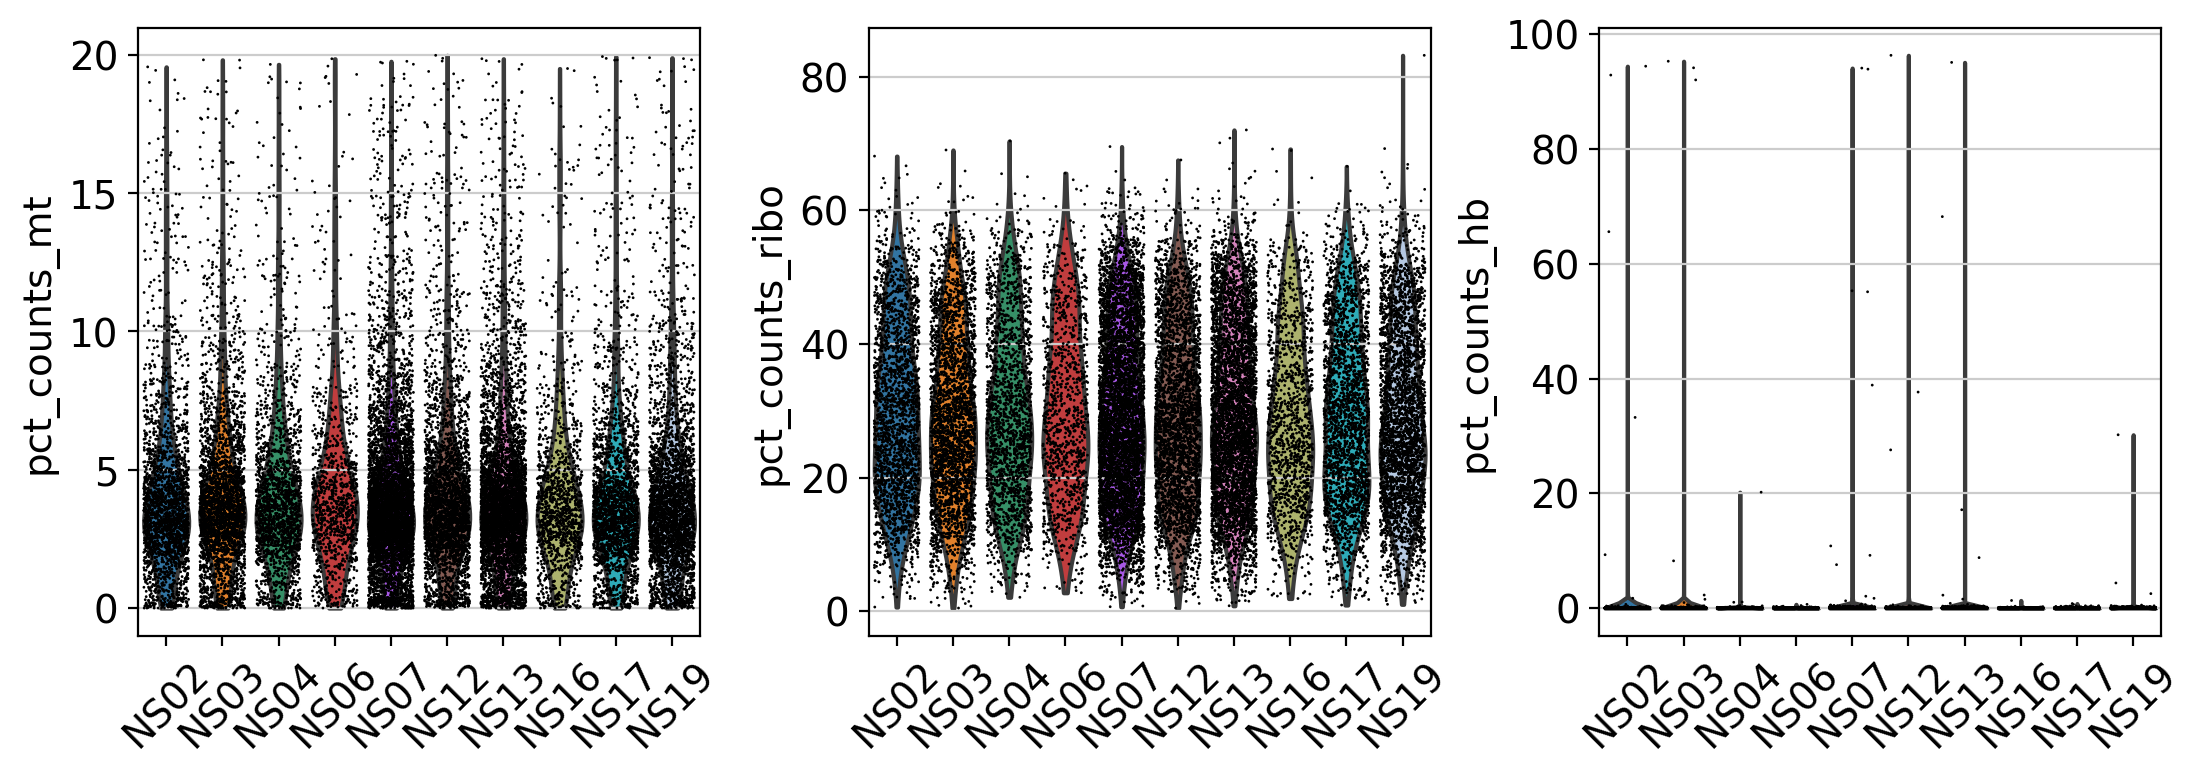

In [90]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

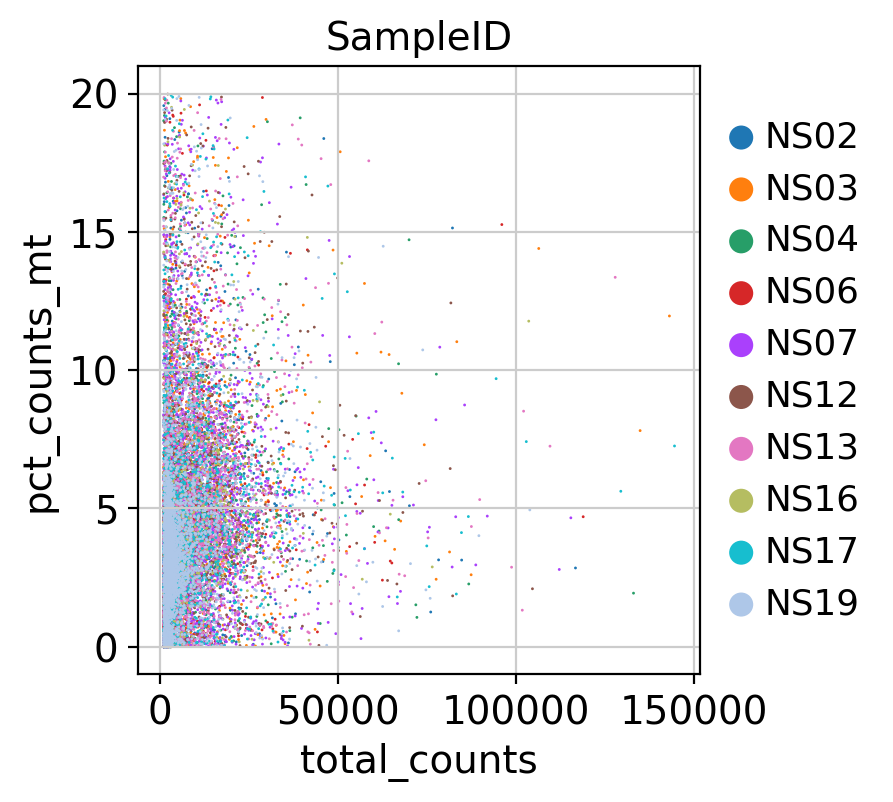

In [91]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="SampleID")

# Filtering

In [92]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

29060 24041


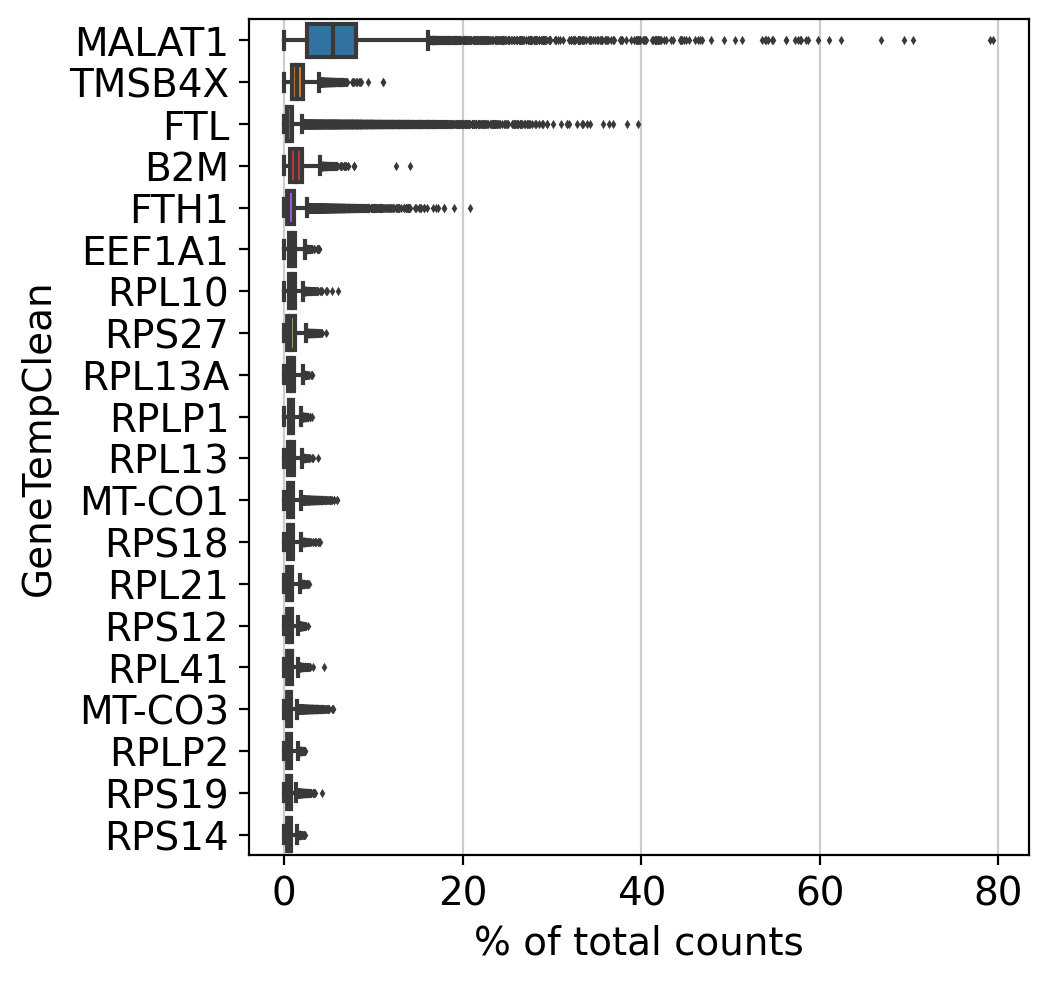

In [93]:
sc.pl.highest_expr_genes(adata, n_top=20)

# Mito/Ribo filtering

In [94]:
adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]
adata = adata[adata.obs['pct_counts_hb'] < 2, :]
print("Remaining cells %d"%adata.n_obs)

Remaining cells 28725


# Plot filtered QC

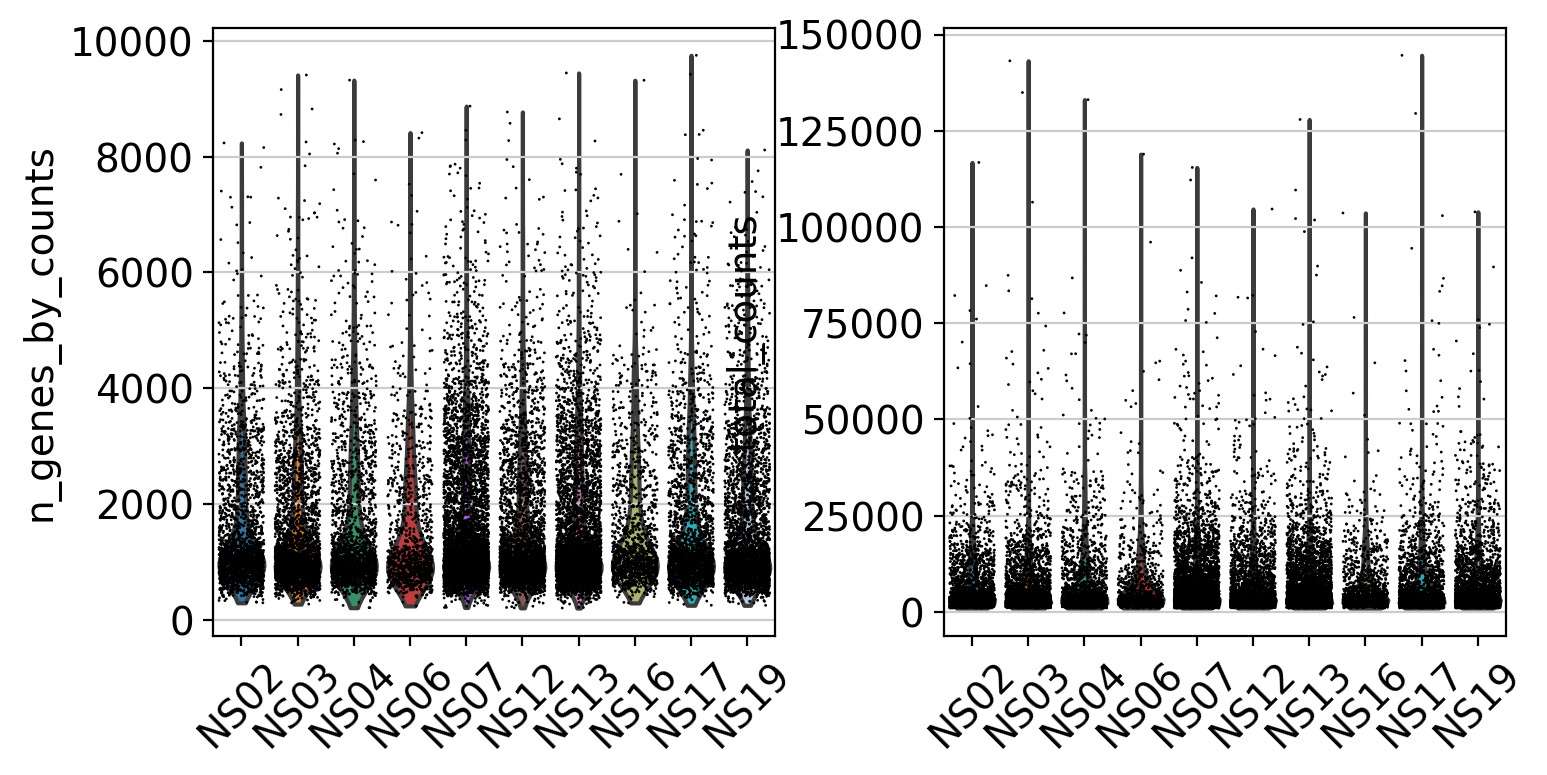

In [95]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

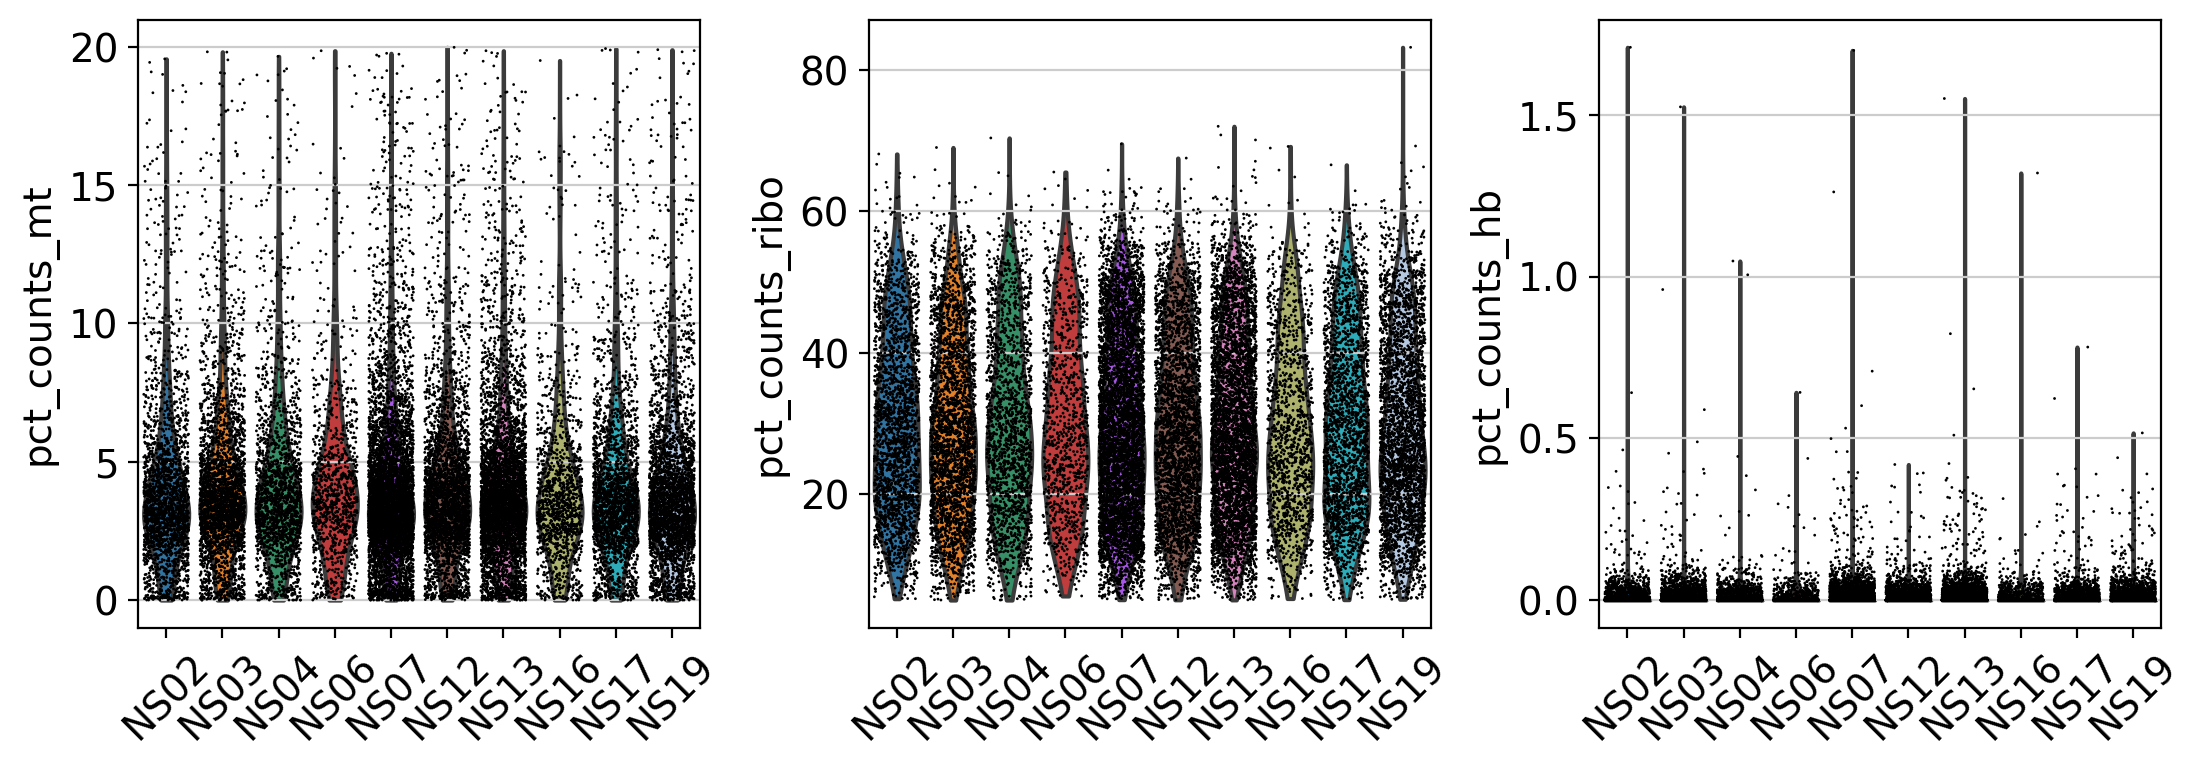

In [96]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'SampleID', rotation= 45)

# Filter genes

In [97]:
mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")

In [98]:
mito_gene_indicator = np.in1d(adata.var_names, mito_gene_names)

In [99]:
adata = adata[:, ~mito_gene_indicator]

In [100]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
ribo_genes = adata.var_names.str.startswith(("RPL","RPS"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(ribo_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

28725 24028
28725 23915


# Calculate cell-cycle scores

In [101]:
cell_cycle_genes = [x.strip() for x in open('/home/lugli/spuccio/Projects/SP035_TregIntegration/Analysis/regev_lab_cell_cycle_genes_homo.txt')]
print(len(cell_cycle_genes))
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

90
89


In [102]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

... storing 'phase' as categorical


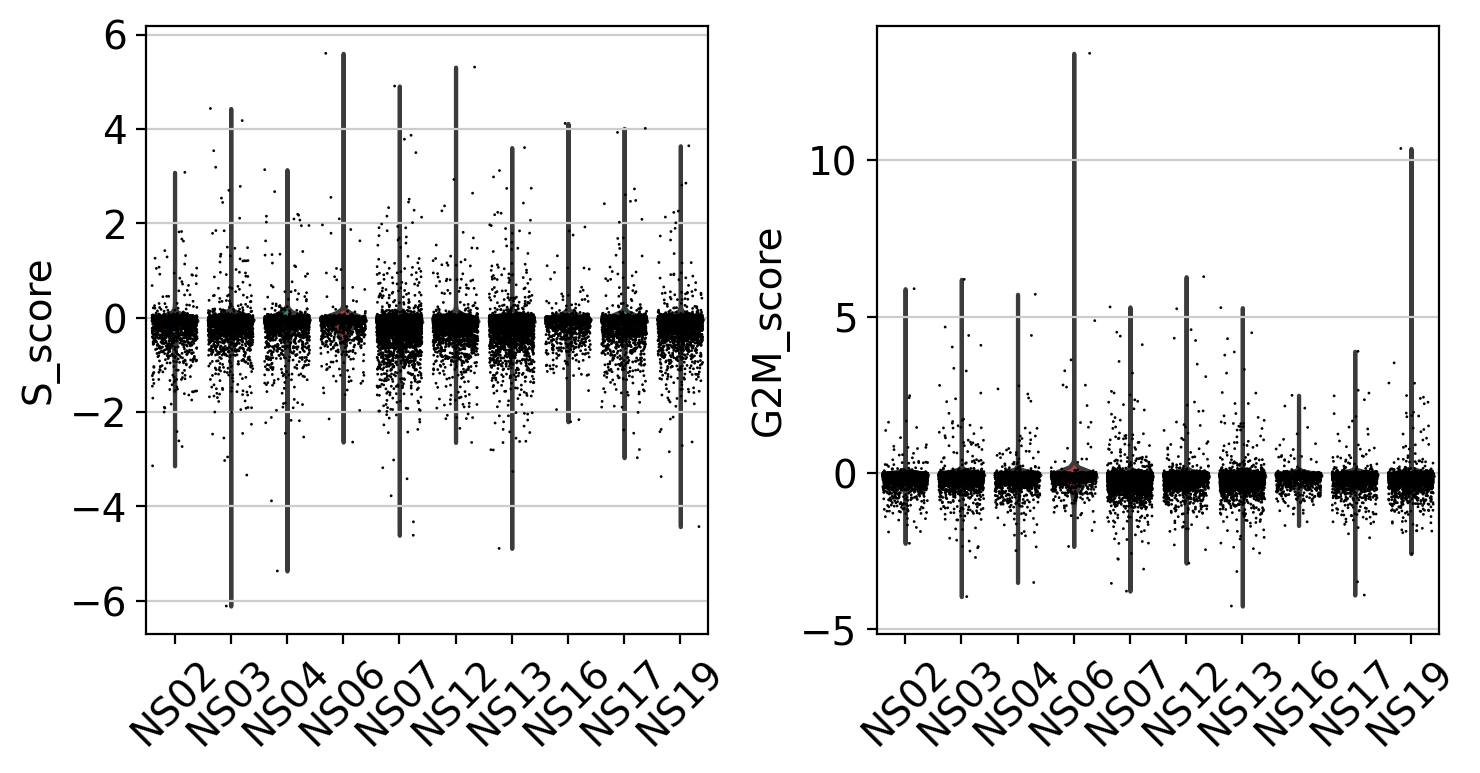

In [103]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'SampleID', rotation=45)

# Predict doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 20.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.8%
Elapsed time: 33.9 seconds


160

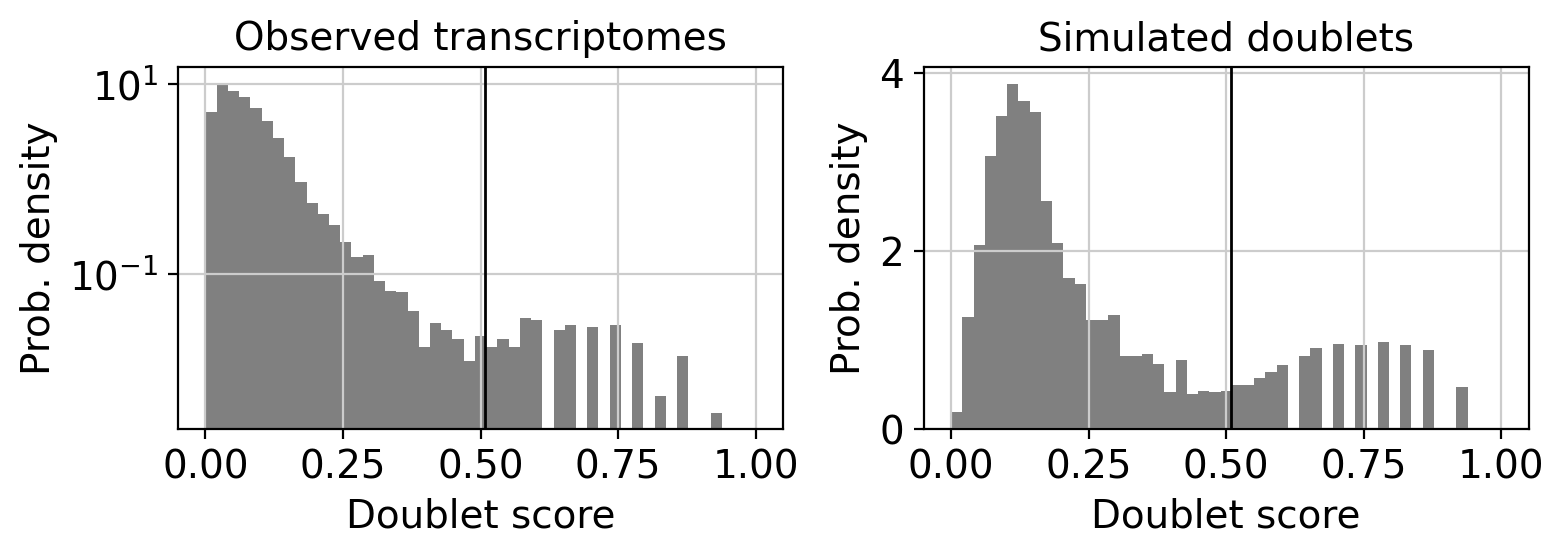

In [104]:
scrub = scr.Scrublet(adata.layers['raw'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [105]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


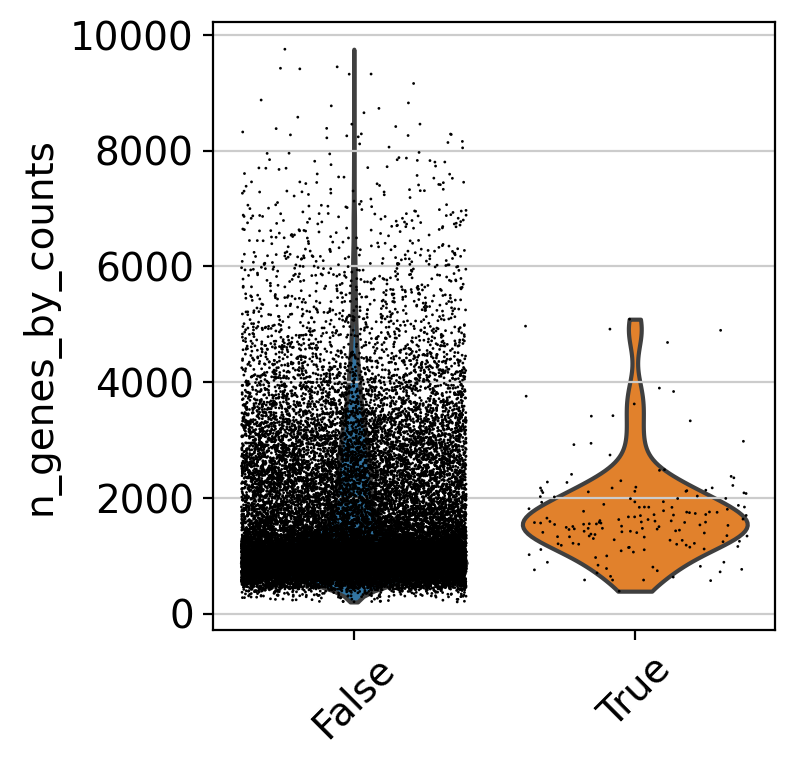

In [106]:
sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [107]:
adata = adata[adata.obs['doublet_info'] == "False",:]

# Processing 

In [108]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.layers['cpm'] = adata.X
# logaritmize
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Filter higly variable genes
#adata.raw = adata

# scale
#sc.pp.scale(adata)

# Celltypist classification

In [109]:
sc.tl.pca(adata,svd_solver='arpack',copy=False)

In [110]:
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=40)

In [111]:
sce.pp.harmony_integrate(adata, ['SampleID'])

2022-06-13 21:57:56,158 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2022-06-13 21:58:01,245 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2022-06-13 21:58:06,487 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2022-06-13 21:58:10,816 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2022-06-13 21:58:12,623 - harmonypy - INFO - Converged after 4 iterations
Converged after 4 iterations


In [112]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [113]:
sc.tl.umap(adata)

In [114]:
adata.obsm['X_umap_harmony'] = adata.obsm['X_umap']

In [115]:
adata

AnnData object with n_obs × n_vars = 28565 × 23915
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 'distances', 'connectivities'

In [116]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 13
📂 Storing models in /home/lugli/spuccio/.celltypist/data/models
💾 Downloading model [1/13]: Immune_All_Low.pkl
💾 Downloading model [2/13]: Immune_All_High.pkl
💾 Downloading model [3/13]: Immune_All_PIP.pkl
💾 Downloading model [4/13]: Immune_All_AddPIP.pkl
💾 Downloading model [5/13]: COVID19_Immune_Landscape.pkl
💾 Downloading model [6/13]: Cells_Fetal_Lung.pkl
💾 Downloading model [7/13]: Cells_Intestinal_Tract.pkl
💾 Downloading model [8/13]: Cells_Lung_Airway.pkl
💾 Downloading model [9/13]: Developing_Mouse_Brain.pkl
💾 Downloading model [10/13]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [11/13]: Human_Lung_Atlas.pkl
💾 Downloading model [12/13]: Nuclei_Lung_Airway.pkl
💾 Downloading model [13/13]: Pan_Fetal_Human.pkl


In [117]:
model = models.Model.load(model = 'Immune_All_High.pkl')

In [118]:
predictionsHigh = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

🔬 Input data has 28565 cells and 23915 genes
🔗 Matching reference genes in the model
🧬 2715 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [119]:
adata.obs['CellCount']= adata.obs['CellCount'].astype(int)

In [120]:
adata.obs['Sample'].value_counts()

Patient23    5637
Patient25    4759
Patient28    3245
Patient24    3122
Patient20    2936
Patient27    2365
Patient19    2274
Patient21    1879
Patient26    1292
Patient22    1056
Name: Sample, dtype: int64

In [121]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_D_PMID32385277_GSE131907.h5ad")

In [122]:
predictionsHigh.to_adata()

AnnData object with n_obs × n_vars = 28565 × 23915
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony'
    varm: 'PCs'
    layers: 'raw', 'cpm', 'log1p'
    obsp: 

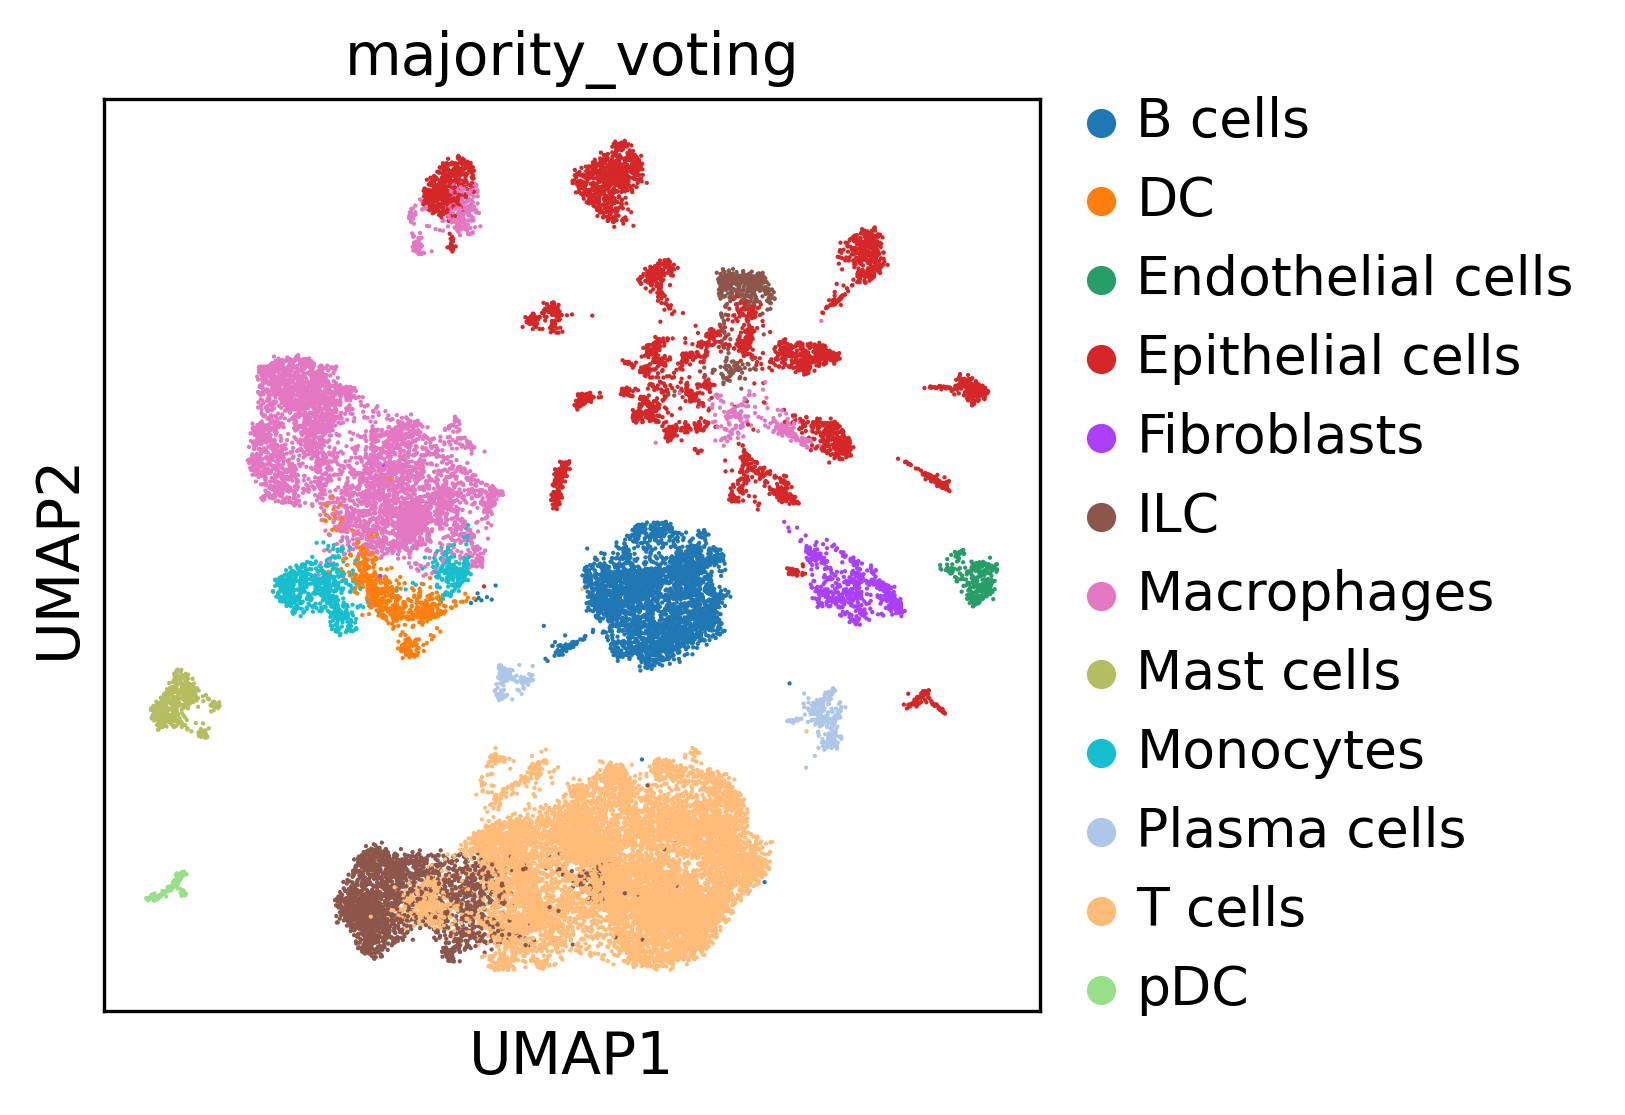

In [123]:
sc.set_figure_params(dpi=150)
sc.pl.umap(predictionsHigh.to_adata(), color='majority_voting')

# PangaDB classification

In [124]:
adata = adata[:, adata.var.highly_variable]

In [125]:
markers = dc.get_resource('PanglaoDB')
markers

label genesymbol canonical_marker         cell_type germ_layer human  \
0          CTRB1            False       Enterocytes   Endoderm  True   
1          CTRB1             True      Acinar cells   Endoderm  True   
2           KLK1             True      Acinar cells   Endoderm  True   
3           KLK1            False      Goblet cells   Endoderm  True   
4           KLK1            False  Epithelial cells   Mesoderm  True   
...          ...              ...               ...        ...   ...   
8472     SLC14A1             True  Urothelial cells   Mesoderm  True   
8473       UPK3A             True  Urothelial cells   Mesoderm  True   
8474       UPK1A             True  Urothelial cells   Mesoderm  True   
8475        UPK2             True  Urothelial cells   Mesoderm  True   
8476       UPK3B             True  Urothelial cells   Mesoderm  True   

label human_sensitivity human_specificity mouse mouse_sensitivity  \
0                   0.0        0.00439422  True        0.00331126   
1                   1.0       0.000628931  True          0.957143   
2              0.833333        0.00503145  True          0.314286   
3              0.588235        0.00503937  True          0.903226   
4                   0.0        0.00823306  True          0.225806   
...                 ...               ...   ...               ...   
8472                0.0         0.0181704  True               0.0   
8473                0.0               0.0  True               0.0   
8474                0.0               0.0  True               0.0   
8475                0.0               0.0  True               0.0   
8476                0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
0             0.0204803        9606         GI tract           0.017  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
3             0.0124084        9606         GI tract           0.013  
4             0.0137585        9606       Epithelium           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[8477 rows x 13 columns]

In [ ]:
markers['organ'].value_counts()

In [126]:
# Filter by canonical_marker and human
markers = markers[(markers['human']=='True')&(markers['canonical_marker']=='True')]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

label genesymbol canonical_marker                     cell_type germ_layer  \
1          CTRB1             True                  Acinar cells   Endoderm   
2           KLK1             True                  Acinar cells   Endoderm   
5           KLK1             True               Principal cells   Mesoderm   
7           KLK1             True  Plasmacytoid dendritic cells   Mesoderm   
8           KLK1             True             Endothelial cells   Mesoderm   
...          ...              ...                           ...        ...   
8472     SLC14A1             True              Urothelial cells   Mesoderm   
8473       UPK3A             True              Urothelial cells   Mesoderm   
8474       UPK1A             True              Urothelial cells   Mesoderm   
8475        UPK2             True              Urothelial cells   Mesoderm   
8476       UPK3B             True              Urothelial cells   Mesoderm   

label human human_sensitivity human_specificity mouse mouse_sensitivity  \
1      True               1.0       0.000628931  True          0.957143   
2      True          0.833333        0.00503145  True          0.314286   
5      True               0.0        0.00814536  True          0.285714   
7      True               0.0        0.00820189  True               1.0   
8      True               0.0        0.00841969  True               0.0   
...     ...               ...               ...   ...               ...   
8472   True               0.0         0.0181704  True               0.0   
8473   True               0.0               0.0  True               0.0   
8474   True               0.0               0.0  True               0.0   
8475   True               0.0               0.0  True               0.0   
8476   True               0.0               0.0  True               0.0   

label mouse_specificity ncbi_tax_id            organ ubiquitiousness  
1             0.0159201        9606         Pancreas           0.017  
2             0.0128263        9606         Pancreas           0.013  
5             0.0140583        9606           Kidney           0.013  
7             0.0129136        9606    Immune system           0.013  
8             0.0149153        9606      Vasculature           0.013  
...                 ...         ...              ...             ...  
8472                0.0        9606  Urinary bladder           0.008  
8473                0.0        9606  Urinary bladder             0.0  
8474                0.0        9606  Urinary bladder             0.0  
8475                0.0        9606  Urinary bladder             0.0  
8476                0.0        9606  Urinary bladder             0.0  

[5180 rows x 13 columns]

In [127]:
# Run leiden clustering algorithm
sc.tl.leiden(adata)

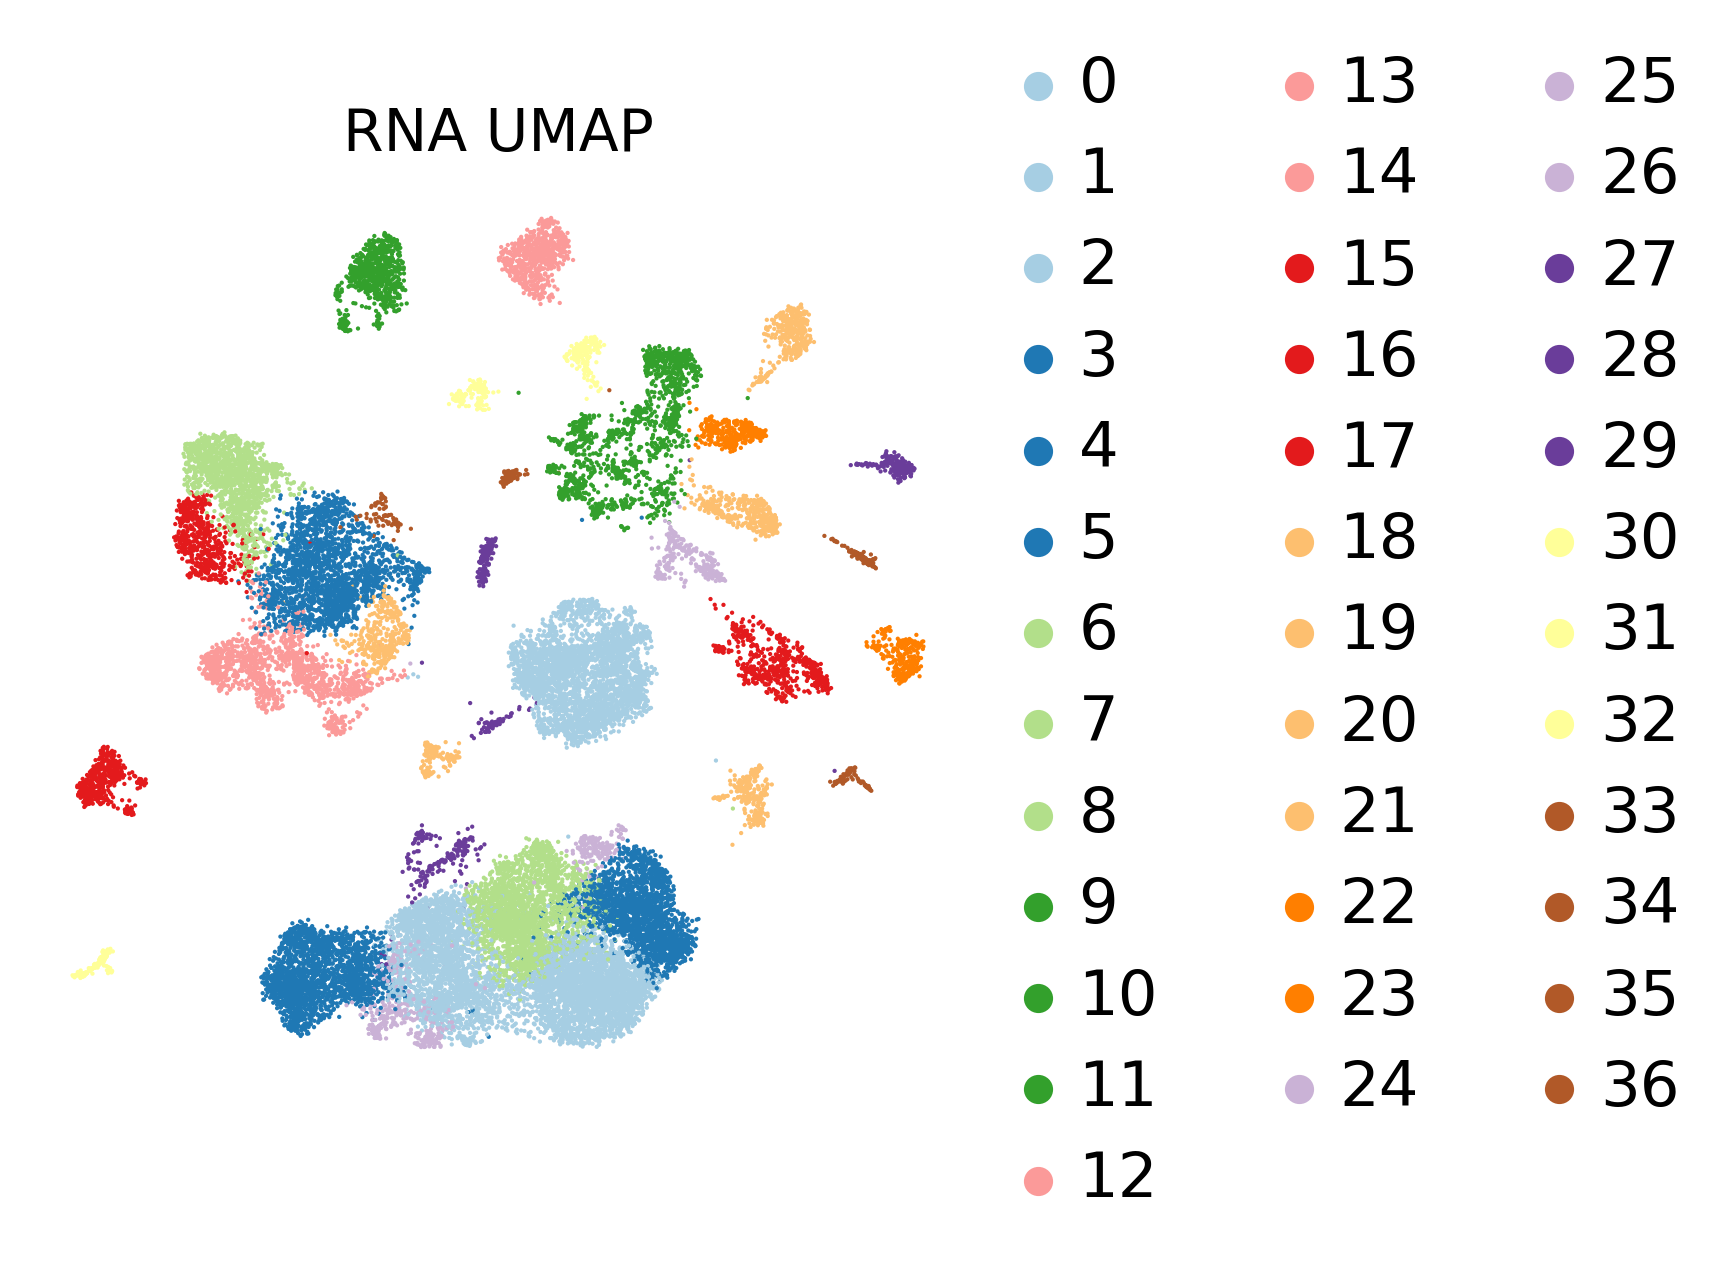

In [128]:
# Visualize
sc.pl.umap(adata, color='leiden', title='RNA UMAP',palette='Paired',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [129]:
dc.run_ora(mat=adata, net=markers, source='cell_type', target='genesymbol', min_n=3, verbose=True,use_raw=False)

Running ora on mat with 28565 samples and 3478 targets for 113 sources.


100%|██████████| 28565/28565 [00:09<00:00, 2865.59it/s]


In [130]:
adata.obsm['ora_estimate']

source     Acinar cells  Adipocytes  Airway goblet cells  Alpha cells  \
NS02-0         0.815203    0.568476            -0.000000    -0.000000   
NS02-1         0.815203   -0.000000            -0.000000    -0.000000   
NS02-2         4.712867    1.408039            -0.000000     2.584586   
NS02-3         0.815203    0.568476            -0.000000    -0.000000   
NS02-4         3.247154   -0.000000            -0.000000    -0.000000   
...                 ...         ...                  ...          ...   
NS19-3295      9.811876    3.581195             1.587122    -0.000000   
NS19-3296      0.815203   -0.000000            -0.000000    -0.000000   
NS19-3297      1.932668    0.568476            -0.000000    -0.000000   
NS19-3298      0.815203    0.568476            -0.000000     1.121223   
NS19-3299      9.811876    2.426826            -0.000000    -0.000000   

source     Astrocytes    B cells  B cells memory  B cells naive  Basal cells  \
NS02-0       1.889378   3.955064        5.857200       4.270050     -0.00000   
NS02-1       4.618910  13.478332       20.456848      23.035067     -0.00000   
NS02-2       0.794761  -0.000000       -0.000000       0.472213     -0.00000   
NS02-3       0.794761   1.581738        1.305737       0.472213     -0.00000   
NS02-4       3.179349   2.698424        4.562845       3.132335     -0.00000   
...               ...        ...             ...            ...          ...   
NS19-3295    1.889378   3.955064        0.520913       0.472213      1.46406   
NS19-3296    0.794761   2.698424        4.562845       5.497913     -0.00000   
NS19-3297    0.794761   0.649783        2.266541       1.200271     -0.00000   
NS19-3298    0.794761  21.237230       22.341862      24.914442     -0.00000   
NS19-3299    1.889378   3.955064       -0.000000       0.472213     -0.00000   

source     Basophils  ...  Smooth muscle cells    T cells  T helper cells  \
NS02-0      3.115178  ...             1.430423  11.857122        2.490161   
NS02-1      1.848379  ...             0.578919   6.893339        2.490161   
NS02-2      1.848379  ...             1.430423  -0.000000       -0.000000   
NS02-3      3.115178  ...             0.578919  15.527693        2.490161   
NS02-4     -0.000000  ...             0.578919  11.857122        1.077327   
...              ...  ...                  ...        ...             ...   
NS19-3295   1.848379  ...             1.430423  -0.000000       -0.000000   
NS19-3296   3.115178  ...            -0.000000   6.893339        1.077327   
NS19-3297   7.712938  ...             0.578919   4.016576        1.077327   
NS19-3298   0.775404  ...            -0.000000   5.405376        1.077327   
NS19-3299   3.115178  ...             0.578919   0.663212        1.077327   

source     T regulatory cells  Tanycytes  Taste receptor cells  Thymocytes  \
NS02-0              -0.000000   1.170512             -0.000000    5.759088   
NS02-1              -0.000000   1.170512              1.587122    5.759088   
NS02-2               1.226638  -0.000000             -0.000000   -0.000000   
NS02-3               1.226638  -0.000000             -0.000000    1.037793   
NS02-4              -0.000000  -0.000000             -0.000000    1.037793   
...                       ...        ...                   ...         ...   
NS19-3295            1.226638  -0.000000             -0.000000   -0.000000   
NS19-3296           -0.000000  -0.000000             -0.000000    1.037793   
NS19-3297           -0.000000   1.170512             -0.000000    1.037793   
NS19-3298            1.226638  -0.000000             -0.000000    1.037793   
NS19-3299            2.813693   1.170512              1.587122   -0.000000   

source     Trophoblast cells  Tuft cells  Urothelial cells  
NS02-0             -0.000000   -0.000000              -0.0  
NS02-1             -0.000000    1.464060              -0.0  
NS02-2             -0.000000   -0.000000              -0.0  
NS02-3             -0.000000    1.464060              -0

In [131]:
adata.obsm['ora_estimate'].columns

Index(['Acinar cells', 'Adipocytes', 'Airway goblet cells', 'Alpha cells',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       'Basal cells', 'Basophils',
       ...
       'Smooth muscle cells', 'T cells', 'T helper cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', name='source', length=113)

In [132]:
acts = dc.get_acts(adata, obsm_key='ora_estimate')
acts

AnnData object with n_obs × n_vars = 28565 × 113
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'ora_estimate', 'ora_pvals'

In [133]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
mean_enr

Acinar cells  Adipocytes    B cells  B cells memory  B cells naive  \
0       1.394789    0.433251  14.833568       18.543495      20.729361   
1       1.408418    0.502794   3.510987        4.484802       3.629082   
10      5.947230    3.387530   2.254630        0.473101       0.897792   
11      6.024227    3.655754   1.403329        0.411045       0.773961   
12      2.593861    1.549823   2.773600        3.599540       5.386427   
13      7.504282    3.040231   2.331859        0.467972       0.928708   
14      2.338822    1.970500   1.623917        1.887549       2.513818   
15      2.119488    5.046216   1.272693        0.732620       1.685074   
16      1.400049   10.241369   0.588083        0.332119       0.415477   
17      1.468876    1.868204   1.114035        2.549437       2.608611   
18      3.318632    2.575782   1.278882        0.534302       0.787738   
19      1.364906    0.874513   7.962996        9.037789       6.352453   
2       1.397566    0.840702   2.304368        3.129693       2.416074   
20      3.881462    2.862294   2.492003        0.269023       0.613316   
21      2.467983    1.898361   1.609585        2.336796       3.092451   
22      6.270684    3.136501   1.060872        0.126223       0.497940   
23      1.497358    2.465357   0.423494        0.672113       0.800046   
24      1.601250    0.765512   1.699123        2.812490       2.027663   
25      1.054258    0.646756   1.739776        2.955473       2.759912   
26      1.599670    1.443661   2.285614        0.892890       0.846700   
27      0.478738    1.168501   7.987703        8.021397       8.823044   
28      3.858113    1.727369   2.129883        1.281249       1.278040   
29      3.860153    4.129192   0.911057        0.232653       1.174011   
3       2.738501    2.492561   1.508960        1.771372       2.479426   
30      6.145869    2.745910   2.084046        0.250477       0.407888   
31      4.761677    3.500305   1.818135        0.515223       1.056506   
32      0.544552    1.168015   3.630900        5.793795       7.928486   
33      3.101901    2.043746   1.111217        0.224202       0.275867   
34      1.430488    1.351851   0.595255        0.867118       0.546889   
35      3.603008    1.295753   0.987799        0.925965       0.639809   
36      3.063456    2.471897   1.045866        1.703024       1.935979   
4       1.409969    0.702399   3.312462        3.748781       3.240855   
5       1.452969    0.938635   1.218192        2.011142       1.578233   
6       1.595109    0.890846   2.576102        3.557428       3.029438   
7       2.206759    4.654016   1.029598        0.959629       1.755287   
8       1.153889    1.170076   3.246658        4.402611       3.684823   
9       4.494482    2.084899   1.110316        0.747327       0.785826   

    Basophils  Cholangiocytes  Clara cells  Dendritic cells  Ductal cells  \
0    1.499756        0.493167     0.139958        13.648491      0.372777   
1    1.944270        0.162142     0.139671         5.714771      0.195864   
10   2.204618       12.722788     2.321696         5.949533     13.633328   
11   1.758000       10.890289     6.724983         8.227582     12.578286   
12   3.138290        1.220985     0.660551        24.706093      1.029492   
13   1.001720       12.852180     3.640338         4.420374     15.344573   
14   2.206436        0.984983     0.924186        19.914009      1.241976   
15   1.570232        1.194419     2.072250        21.816650      2.684657   
16   1.668728        0.488778     0.646271         2.199939      3.116064   
17   7.418311        0.565757     0.737435         6.220857      0.778188   
18   1.307752        9.150112     1.601504         5.344994     10.820552   
19   1.694474        0.839380     0.746722         6.744069      0.992867   
2    2.552510        0.345014     0.378118         8.354599      0.428038   
20   1.531246        9.806235     0.955866         2.728563      9.388509   
21   2.105593        0.849515     0.

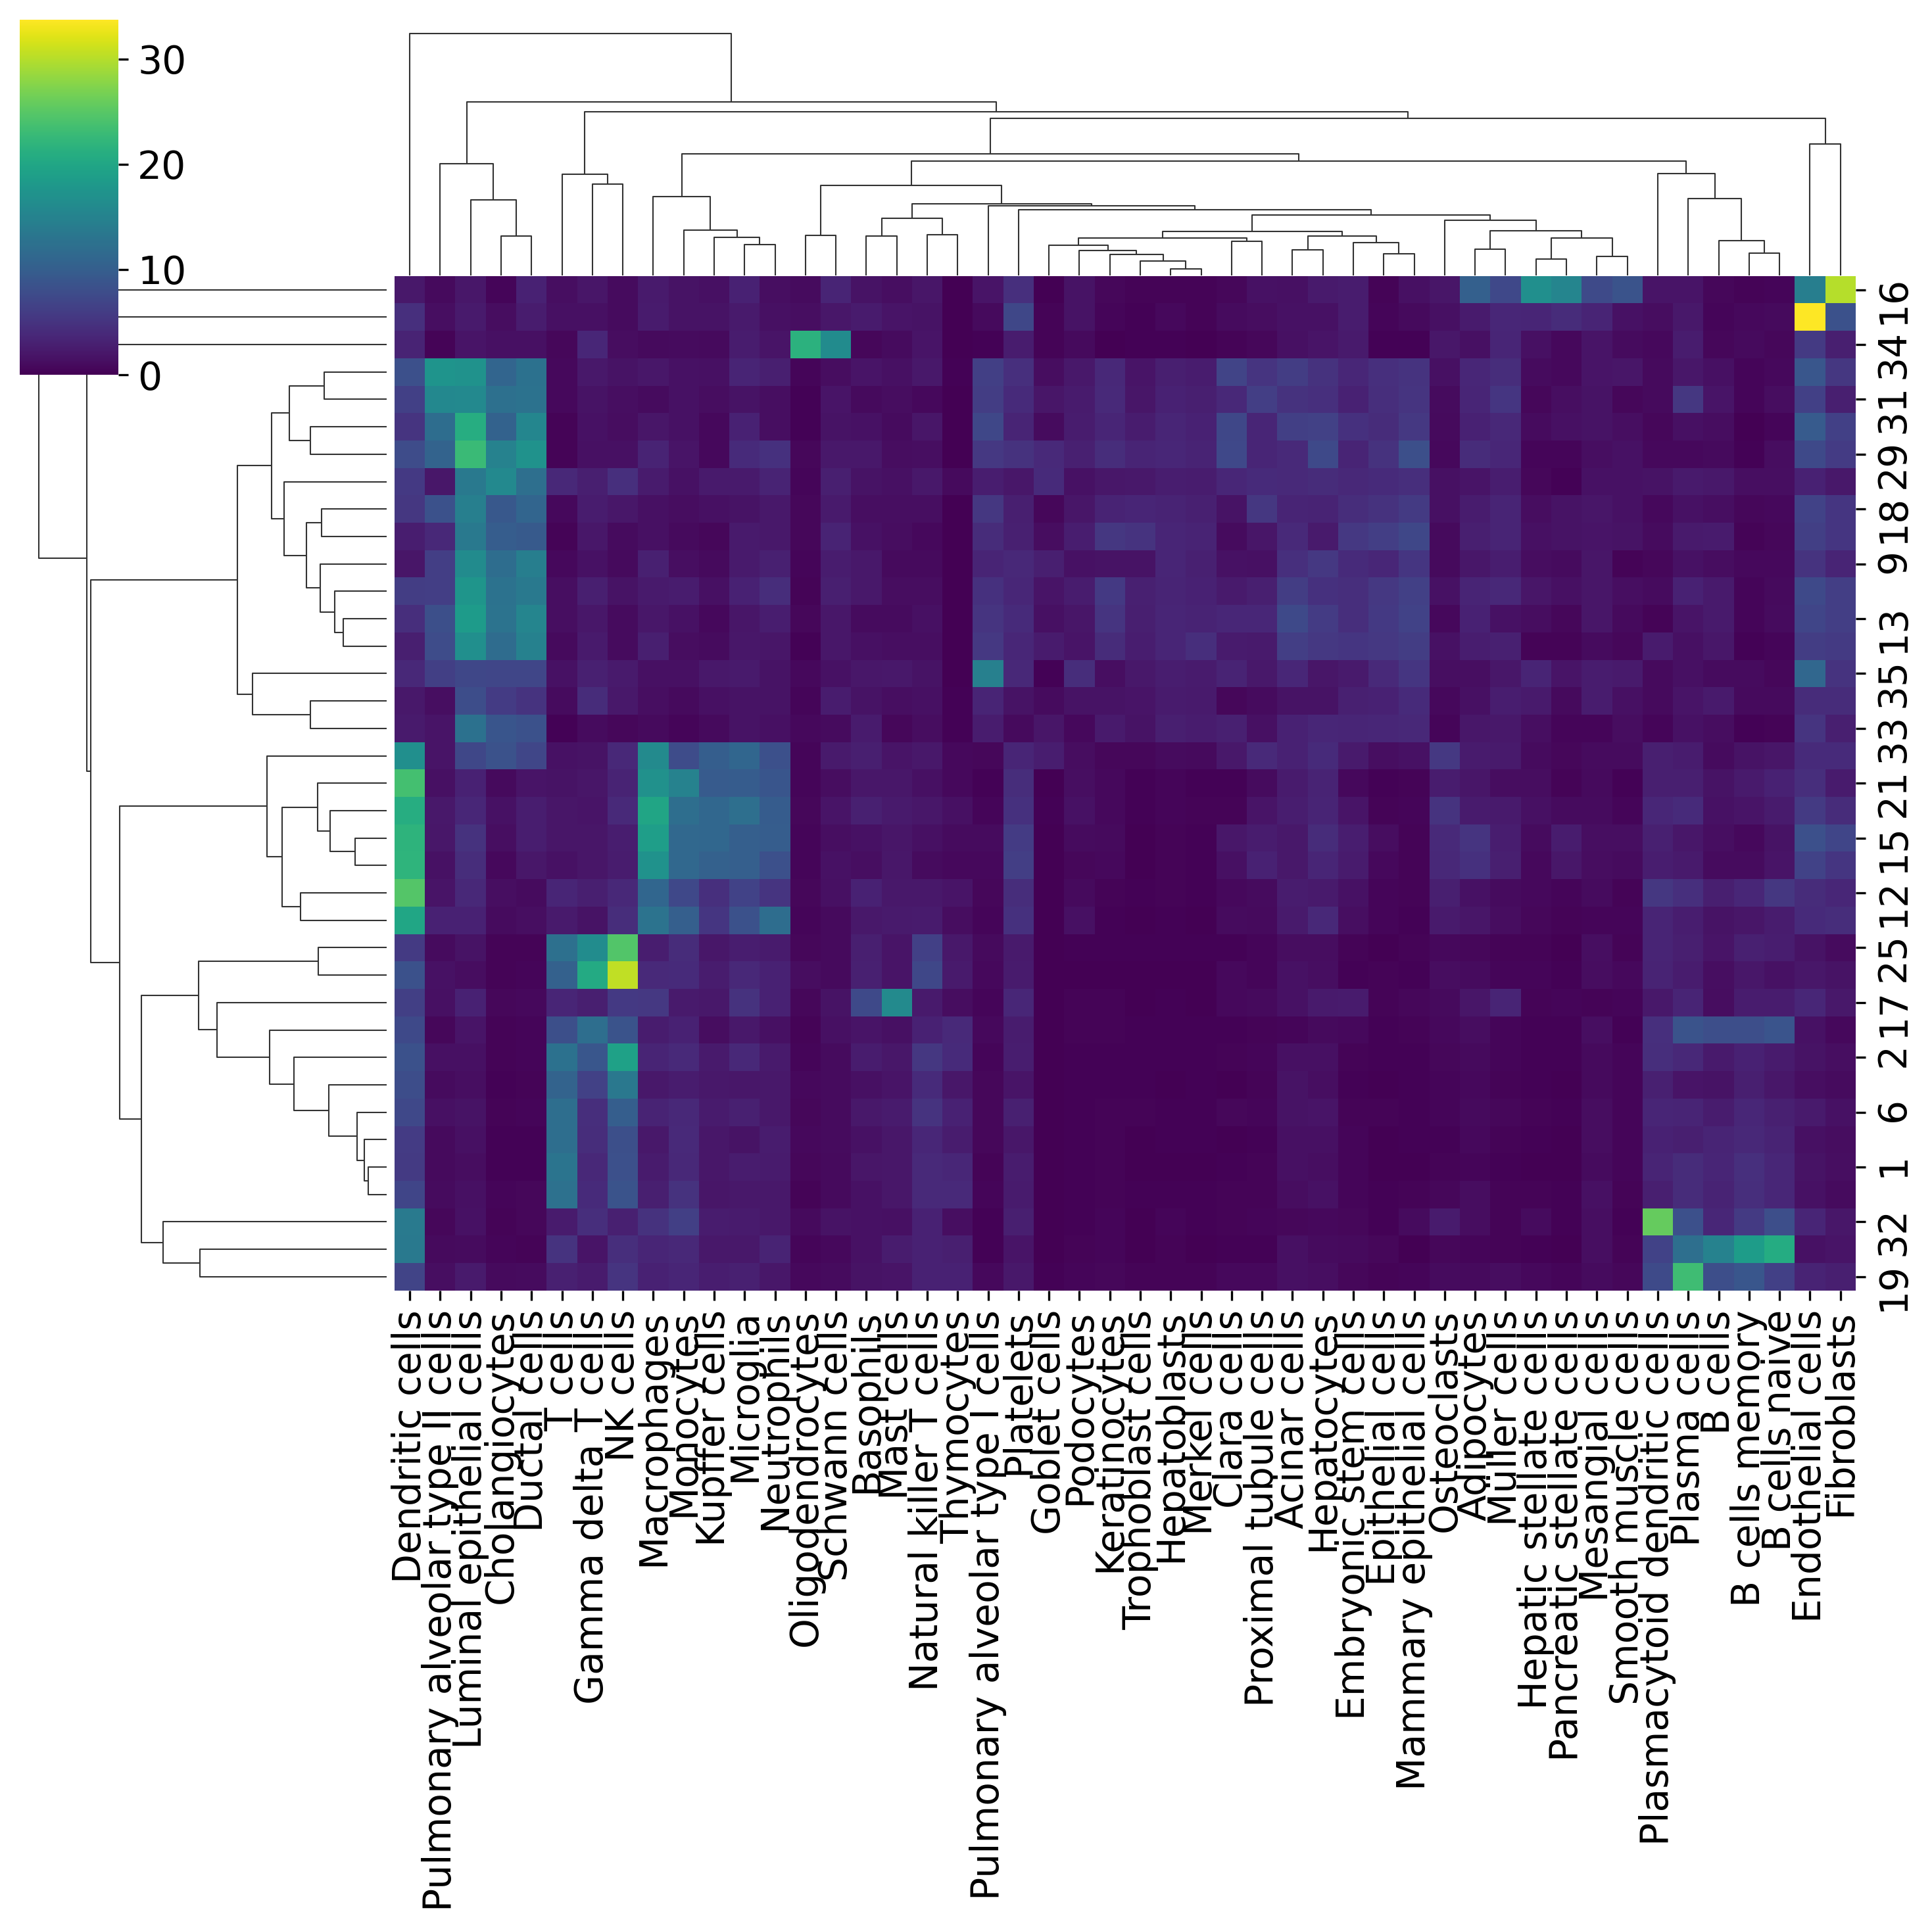

In [134]:
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='viridis')
plt.show()

In [135]:
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'B cells naive',
 '1': 'T cells',
 '10': 'Luminal epithelial cells',
 '11': 'Pulmonary alveolar type II cells',
 '12': 'Dendritic cells',
 '13': 'Luminal epithelial cells',
 '14': 'Dendritic cells',
 '15': 'Dendritic cells',
 '16': 'Fibroblasts',
 '17': 'Mast cells',
 '18': 'Luminal epithelial cells',
 '19': 'Plasma cells',
 '2': 'NK cells',
 '20': 'Luminal epithelial cells',
 '21': 'Dendritic cells',
 '22': 'Luminal epithelial cells',
 '23': 'Endothelial cells',
 '24': 'NK cells',
 '25': 'NK cells',
 '26': 'Luminal epithelial cells',
 '27': 'Gamma delta T cells',
 '28': 'Cholangiocytes',
 '29': 'Luminal epithelial cells',
 '3': 'Dendritic cells',
 '30': 'Luminal epithelial cells',
 '31': 'Luminal epithelial cells',
 '32': 'Plasmacytoid dendritic cells',
 '33': 'Luminal epithelial cells',
 '34': 'Oligodendrocytes',
 '35': 'Pulmonary alveolar type I cells',
 '36': 'Dendritic cells',
 '4': 'T cells',
 '5': 'NK cells',
 '6': 'T cells',
 '7': 'Dendritic cells',
 '8': 'T cells',
 '9':

... storing 'cell_type' as categorical


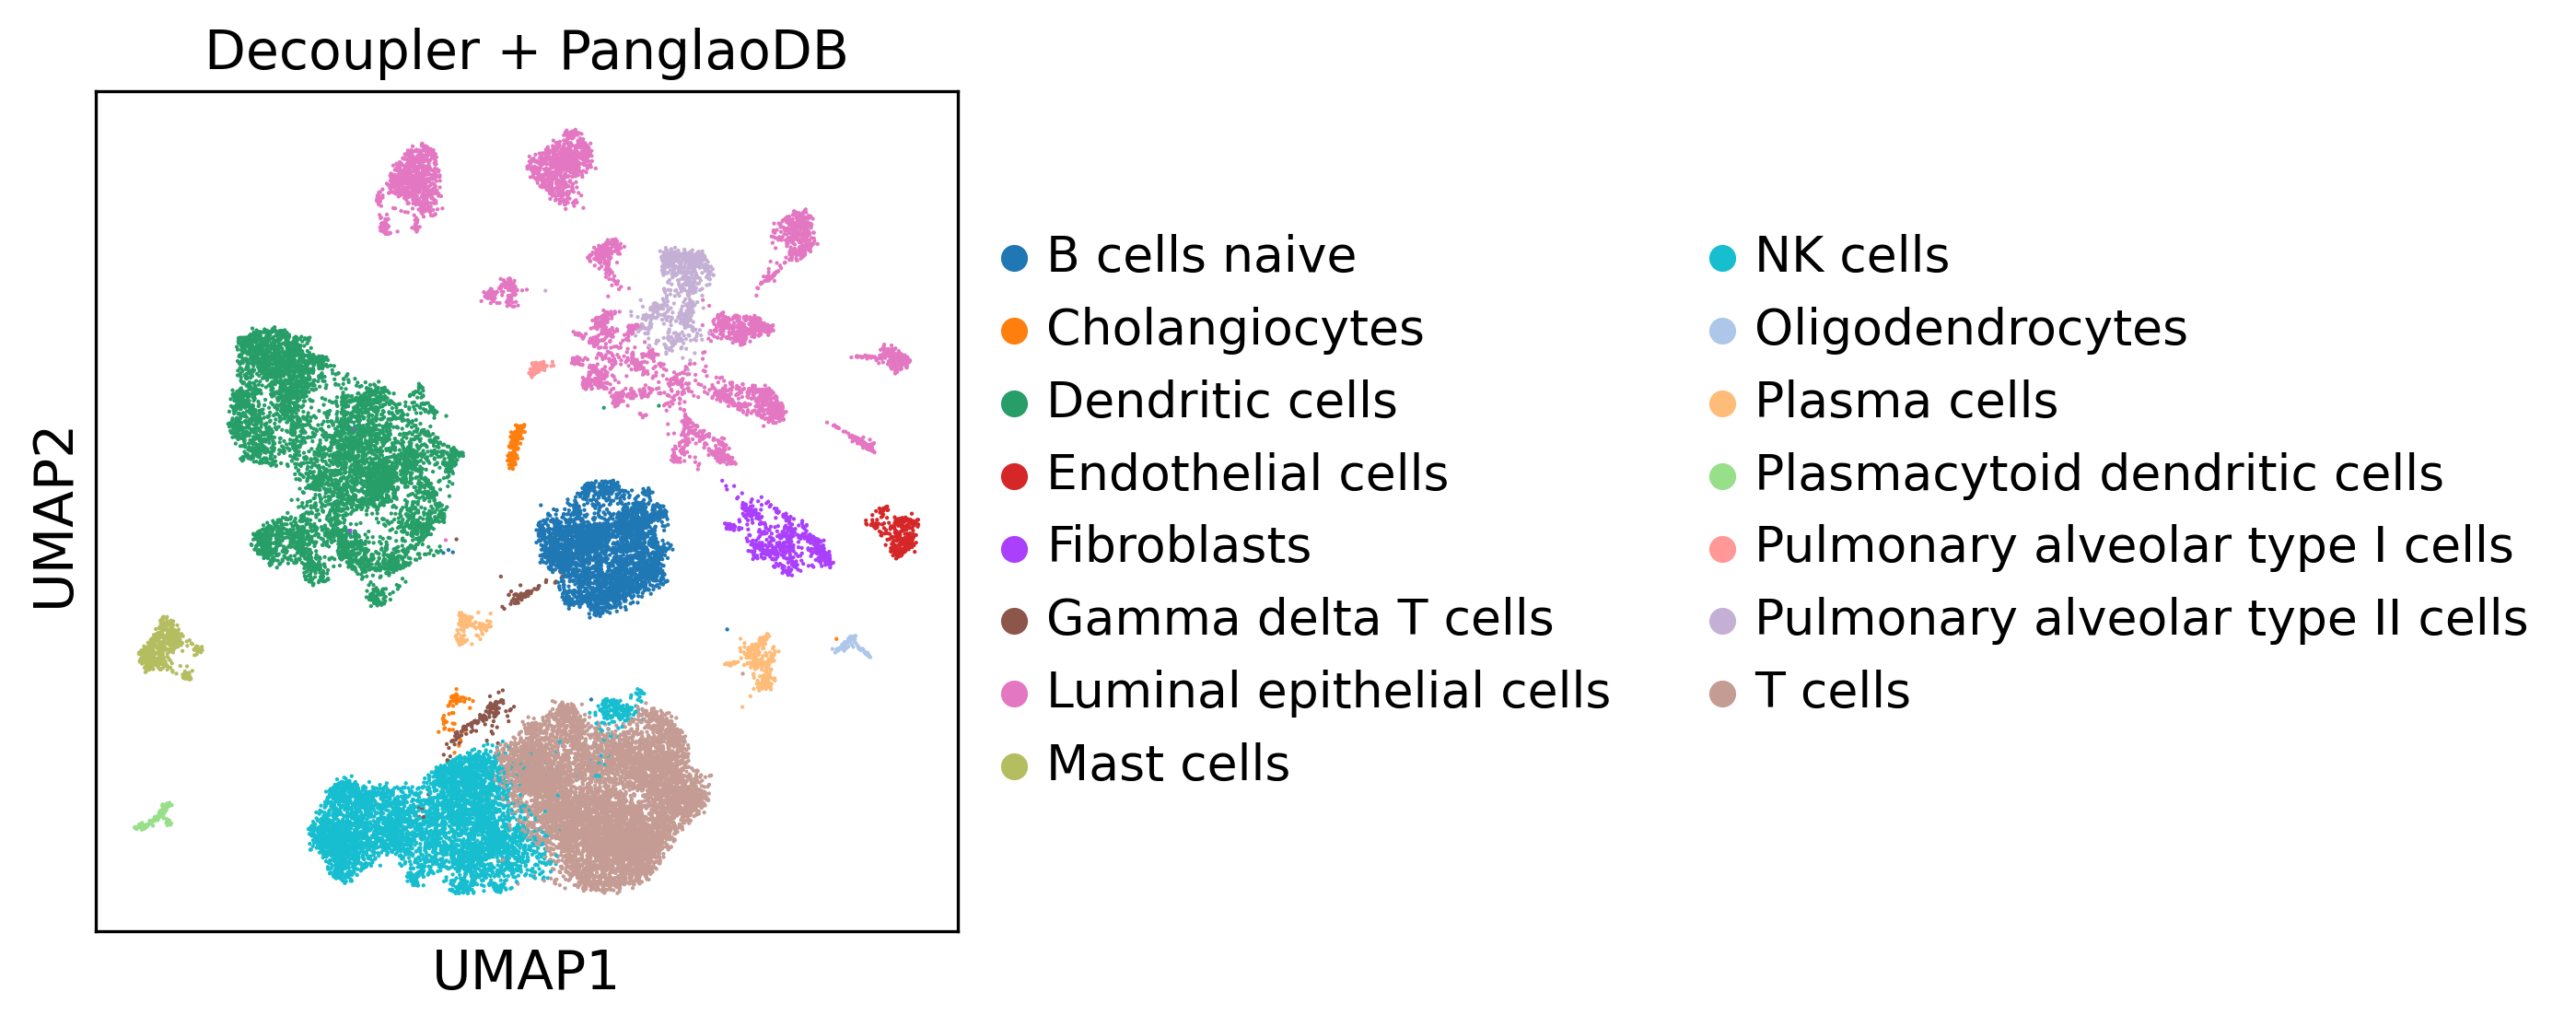

In [136]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type',title='Decoupler + PanglaoDB')

In [137]:
adata

AnnData object with n_obs × n_vars = 28565 × 3478
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'MGMT', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'MET', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'SampleID_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'majority_voting_colors', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X

In [138]:
adata.write("/home/lugli/spuccio/Projects/SP039/FileH5AD_concatenated/Part1_D_PMID32385277_GSE131907.h5ad")